In [ ]:
!pip install pandas-profiling

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# KNN

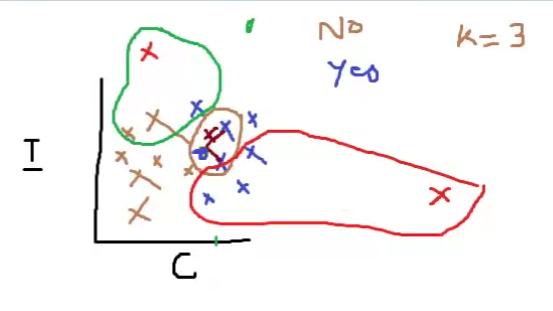

# Clustering

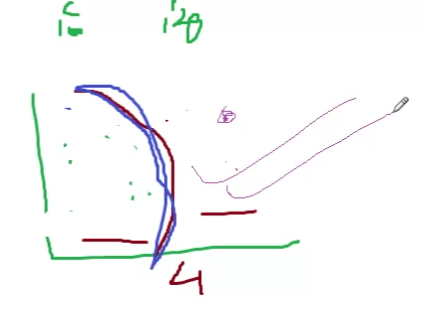

#### Note: Instance (training on running by itself) and learning Models (Model Training). Lazy learning models require training

In [ ]:
df=pd.read_csv('titanic.csv')

In [ ]:
print(df.head())
print(df.shape)
print(df.info())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
(8

In [ ]:
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df[['Age','Cabin','Embarked']]

,Age,Cabin,Embarked
0,22.0,NaN,S
1,38.0,C85,C
2,26.0,NaN,S
3,35.0,C123,S
4,35.0,NaN,S
...,...,...,...
886,27.0,NaN,S
887,19.0,B42,S
888,NaN,NaN,S
889,26.0,C148,C


<Axes: xlabel='Age', ylabel='count'>

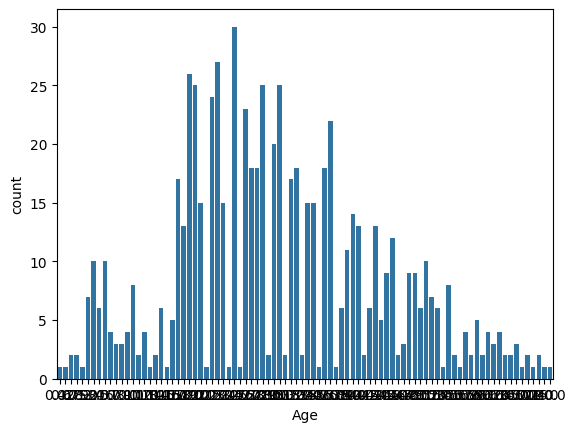

In [ ]:
sns.countplot(data=df,x='Age')


In [ ]:
pip install wordcloud

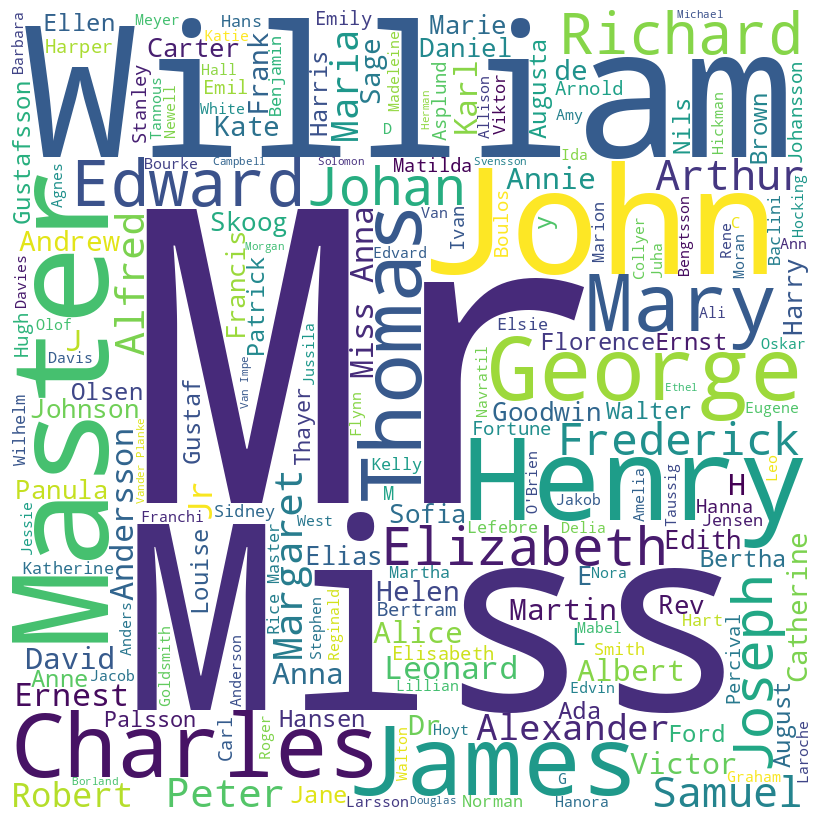

In [ ]:
comment_words = ''
for i in df.Name:
    tokens = i.split()
    for j in tokens:
        comment_words = comment_words + j + ' '


stopwords = set(STOPWORDS)
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

In [ ]:
df.Embarked.mode()

,Embarked
0,S


In [ ]:
replacestr=str(df.Embarked.mode())
df.Embarked = df.Embarked.fillna(replacestr)
df.Age= df.Age.fillna(df.Age.mean())
df.Cabin= df.Cabin.fillna(str(df.Cabin.mode()))
df.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
X=df.drop(columns=['PassengerId','Survived','Name','Fare','Ticket','Cabin'])
y=df.Survived
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Encoding

- Ordinal Ecnoding

- Label Encoding

- Onehot Encoding

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

#### Onehot using existing function of Pandas


In [ ]:
X=pd.get_dummies(X,columns=['Sex','Pclass','Embarked'],drop_first=True,dtype=int)
X

,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,22.000000,1,0,1,0,1,0,0,1
1,38.000000,1,0,0,0,0,1,0,0
2,26.000000,0,0,0,0,1,0,0,1
3,35.000000,1,0,0,0,0,0,0,1
4,35.000000,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
886,27.000000,0,0,1,1,0,0,0,1
887,19.000000,0,0,0,0,0,0,0,1
888,29.699118,1,2,0,0,1,0,0,1
889,26.000000,0,0,1,0,0,1,0,0


In [ ]:
pip install --upgrade scikit-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train

,Age,SibSp,Parch,Sex_male,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
328,31.000000,1,1,0,0,1,0,0,1
683,14.000000,5,2,1,0,1,0,0,1
228,18.000000,0,0,1,1,0,0,0,1
526,50.000000,0,0,0,1,0,0,0,1
743,24.000000,1,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
438,64.000000,1,4,1,0,0,0,0,1
805,31.000000,0,0,1,0,1,0,0,1
181,29.699118,0,0,1,1,0,1,0,0
647,56.000000,0,0,1,0,0,1,0,0


In [ ]:
knn= KNeighborsClassifier(n_neighbors=3)


In [ ]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
y_predict=knn.predict(x_test)
Analysis=pd.DataFrame({'y_test':y_test,'y_predict':y_predict})
Analysis

,y_test,y_predict
122,0,1
698,0,1
274,1,1
711,0,0
146,1,0
...,...,...
200,0,0
391,1,0
85,1,0
870,0,0


In [ ]:
percentage_mismatch=round((Analysis.y_predict!=Analysis.y_test).sum()*100/len(Analysis),2)
print(percentage_mismatch)
print(round(100-percentage_mismatch,2))
from sklearn.metrics import accuracy_score
print(round(accuracy_score(y_test, y_predict)*100,2))

25.14
74.86
74.86


## Confusion Matrix and Classification Report

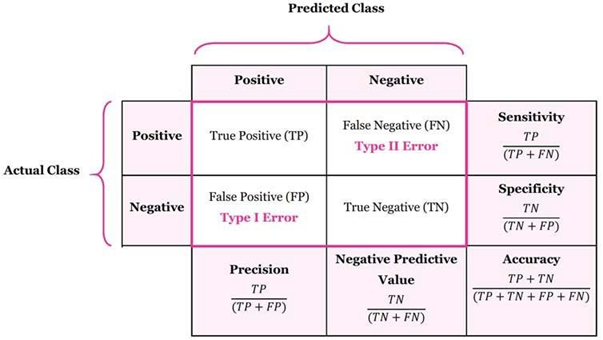

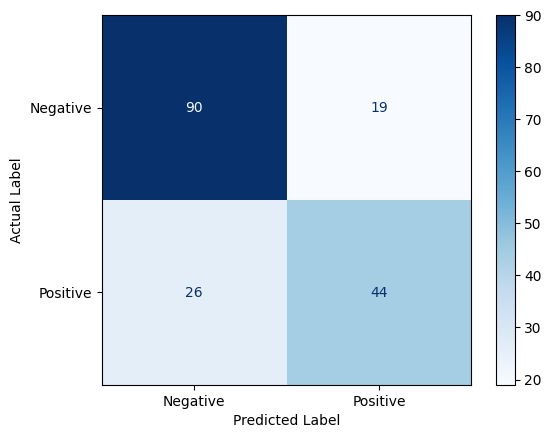

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_predict)

# Visualize the confusion matrix with custom labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Negative", "Positive"])
disp.plot(cmap="Blues")

# Add axis labels for clarification
disp.ax_.set_xlabel('Predicted Label')
disp.ax_.set_ylabel('Actual Label')

# Display the plot
import matplotlib.pyplot as plt
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, classification_report
print('Accuracy Score: ', accuracy_score(y_test, y_predict))
print('Recall Score: ', recall_score(y_test, y_predict))
print('Precision Score: ', precision_score(y_test, y_predict))
print('F1 Score: ', f1_score(y_test, y_predict))
print('Classification Report : \n', classification_report(y_test, y_predict))

Accuracy Score:  0.7486033519553073
Recall Score:  0.6285714285714286
Precision Score:  0.6984126984126984
F1 Score:  0.6616541353383458
Classification Report : 
               precision    recall  f1-score   support

           0       0.78      0.83      0.80       109
           1       0.70      0.63      0.66        70

    accuracy                           0.75       179
   macro avg       0.74      0.73      0.73       179
weighted avg       0.75      0.75      0.75       179



# Part 2


In [ ]:
df=pd.read_csv('cars.csv')
print(df.head())
print(df.info())
print(df.isna().sum())

     brand  km_driven    fuel         owner  selling_price
0   Maruti     145500  Diesel   First Owner         450000
1    Skoda     120000  Diesel  Second Owner         370000
2    Honda     140000  Petrol   Third Owner         158000
3  Hyundai     127000  Diesel   First Owner         225000
4   Maruti     120000  Petrol   First Owner         130000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   brand          8128 non-null   object
 1   km_driven      8128 non-null   int64 
 2   fuel           8128 non-null   object
 3   owner          8128 non-null   object
 4   selling_price  8128 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 317.6+ KB
None
brand            0
km_driven        0
fuel             0
owner            0
selling_price    0
dtype: int64


In [ ]:
print(df.brand.value_counts())
print('\n',df.fuel.value_counts())
print('\n',df.owner.value_counts())

brand
Maruti           2448
Hyundai          1415
Mahindra          772
Tata              734
Toyota            488
Honda             467
Ford              397
Chevrolet         230
Renault           228
Volkswagen        186
BMW               120
Skoda             105
Nissan             81
Jaguar             71
Volvo              67
Datsun             65
Mercedes-Benz      54
Fiat               47
Audi               40
Lexus              34
Jeep               31
Mitsubishi         14
Force               6
Land                6
Isuzu               5
Kia                 4
Ambassador          4
Daewoo              3
MG                  3
Ashok               1
Opel                1
Peugeot             1
Name: count, dtype: int64

 fuel
Diesel    4402
Petrol    3631
CNG         57
LPG         38
Name: count, dtype: int64

 owner
First Owner             5289
Second Owner            2105
Third Owner              555
Fourth & Above Owner     174
Test Drive Car             5
Name: count, dtype

In [ ]:
X=df.drop(columns=['selling_price'])
y=df['selling_price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
print(X_train)
print('\n',X_test)

         brand  km_driven    fuel                 owner
4152   Hyundai      50000  Diesel           First Owner
2780  Mahindra      65000  Diesel           First Owner
2182    Maruti      70000  Diesel           Third Owner
7332   Hyundai       2000  Petrol           First Owner
6449   Hyundai     123278  Petrol          Second Owner
...        ...        ...     ...                   ...
3910   Hyundai      58609  Petrol          Second Owner
4601     Skoda     110000  Diesel           First Owner
3494   Hyundai     120000  Petrol  Fourth & Above Owner
959   Mahindra      90000  Diesel           First Owner
7846    Toyota     100000  Diesel           First Owner

[6502 rows x 4 columns]

            brand  km_driven    fuel         owner
3316        Ford      70000  Diesel   First Owner
2060  Volkswagen      90000  Diesel  Second Owner
5906      Maruti      43000  Petrol   First Owner
8053       Honda      40000  Petrol   First Owner
984      Hyundai      80000  Diesel  Second Owner
.

In [ ]:
ohe=OneHotEncoder(drop='first',sparse_output=False,dtype=np.int32)
ohe

OneHotEncoder(drop='first', dtype=<class 'numpy.int32'>, sparse_output=False)

In [ ]:
X_train_new=ohe.fit_transform(X_train[['fuel','owner']])

In [ ]:
X_test_new = ohe.fit_transform(X_test[['fuel', 'owner']])

In [ ]:
print(X_train_new)
print('\n',X_test_new)
print(X_train.shape)

[[1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]]

 [[1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 1 0 0]]
(6502, 4)
